# Trabalho Prático 3 de PDI
Guilherme Dallmann Lima

Thalía Djune Costa Longaray

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.signal as signal
from skimage.filters import butterworth, gaussian, sobel, unsharp_mask, laplace
from skimage import util, img_as_ubyte

#1)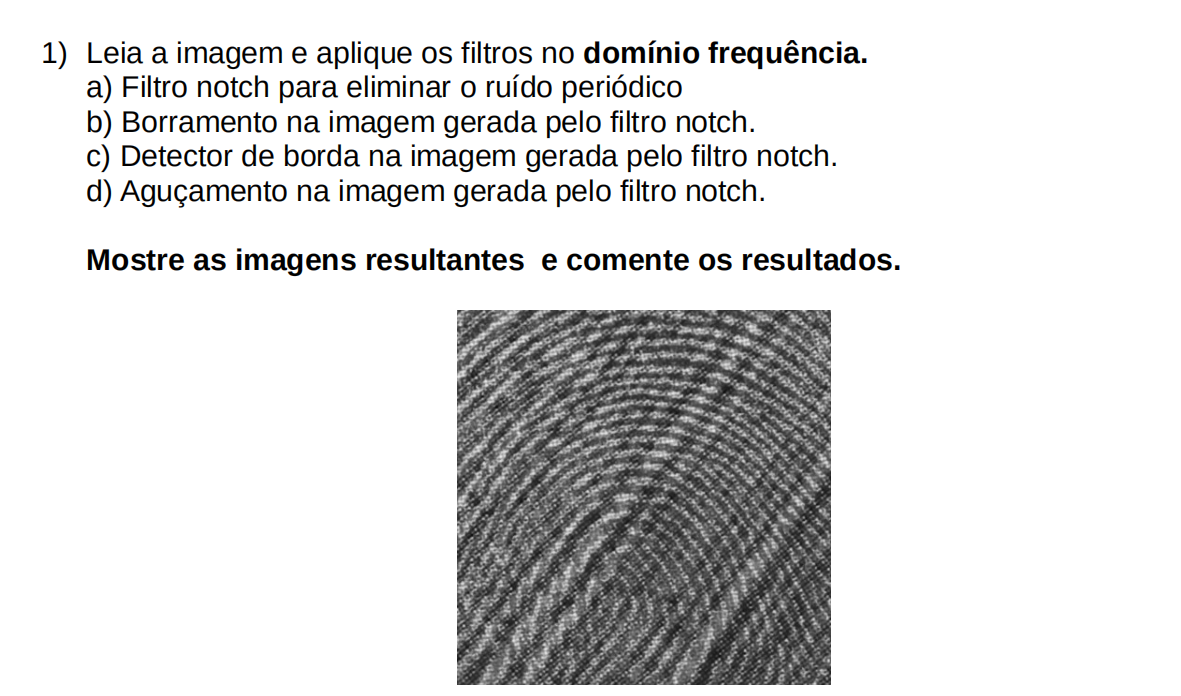

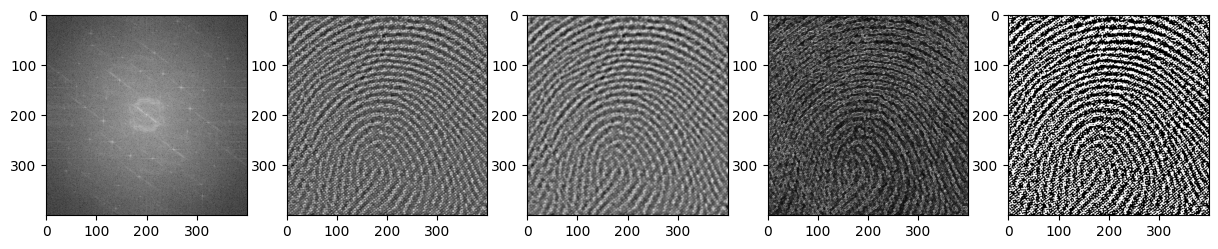

In [ ]:
i1 = io.imread("originalprint.png")
i1fft = np.fft.fftshift(np.fft.fft2(i1))
#A)
i1notch = butterworth(i1, 0.05, True, 15)
#B)
i1gauss = gaussian(i1notch)
#C)
i1sob = sobel(i1notch)
#D)
i1ag = unsharp_mask(i1notch)

fig, axes = plt.subplots(1, 5, figsize=(15,6))
axes[0].imshow(np.log(abs(i1fft)), cmap = 'gray')
axes[1].imshow(i1notch, cmap = 'gray')
axes[2].imshow(i1gauss, cmap = 'gray')
axes[3].imshow(i1sob, cmap = 'gray')
axes[4].imshow(i1ag, cmap = 'gray')

##R:
###A 1ª imagem, foi gerada a partir da Transformada de Fourier.

###Na 2ª imagem, é possível identificar que o filtro de Butterworth atenuou as frequências fora da faixa de corte, resultando em uma transição suave e gradual.

###Na 3ª imagem, utilizou-se o filtro Gaussiano, que reduziu o ruído e os detalhes finos, tornando a imagem mais suave com transições graduais entre as intensidades dos pixels.

###Na 4ª imagem, empregou-se o filtro Sobel, cujo propósito é encontrar as bordas ou transições abruptas de intensidade em uma imagem. Como resultado, a imagem ficou mais escura devido à perda de informações na parte interna.

###Na 5ª imagem, aplicou-se o filtro Unsharp Masking, um filtro de aguçamento usado para realçar detalhes e bordas em uma imagem.

###É possível estabelecer uma comparação entre as imagens 2 e 3, bem como entre as imagens 4 e 5, devido aos objetivos semelhantes que compartilham.

###A distinção entre os filtros aplicados nas imagens 2 e 3 reside na sua finalidade. O filtro de Butterworth é concebido como um filtro de resposta em frequência para atenuar ou realçar frequências específicas em sinais ou imagens, enquanto o borramento é uma técnica utilizada para suavizar uma imagem, resultando em uma aparência mais suave e menos ruidosa.

###A diferença fundamental entre o filtro de Sobel e o Unsharp Masking reside em suas aplicações. Enquanto o filtro de Sobel é empregado na detecção de bordas, destacando transições de intensidade na imagem, o Unsharp Masking é utilizado para aprimorar a nitidez e realçar detalhes sutis na imagem.

#2) 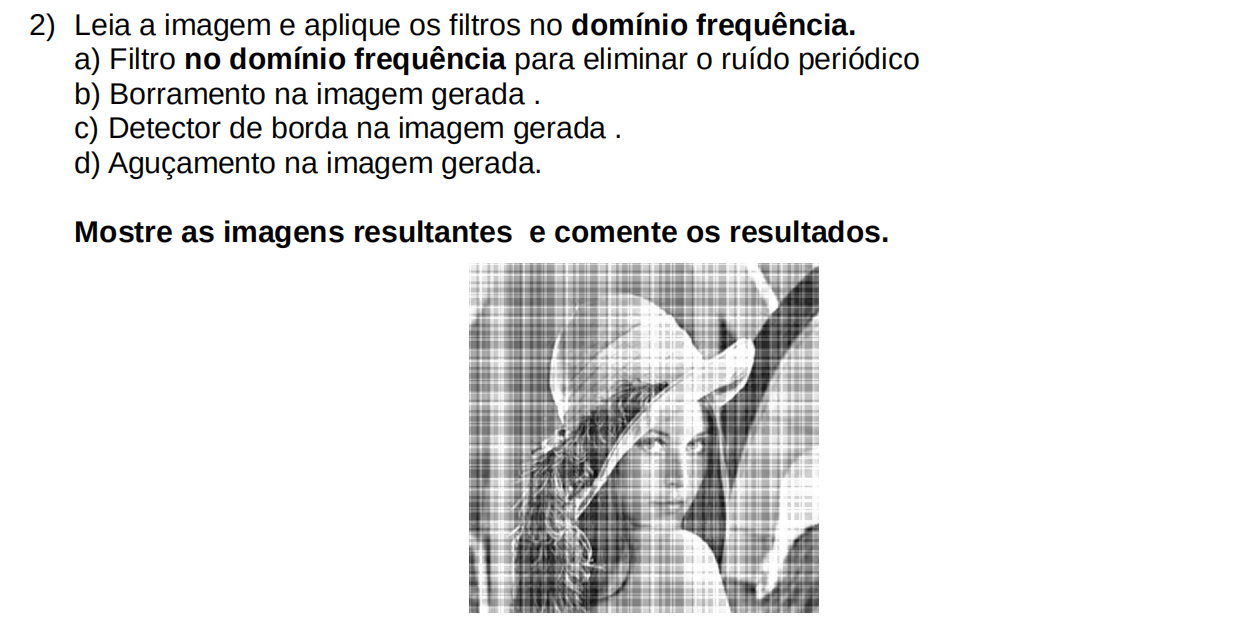

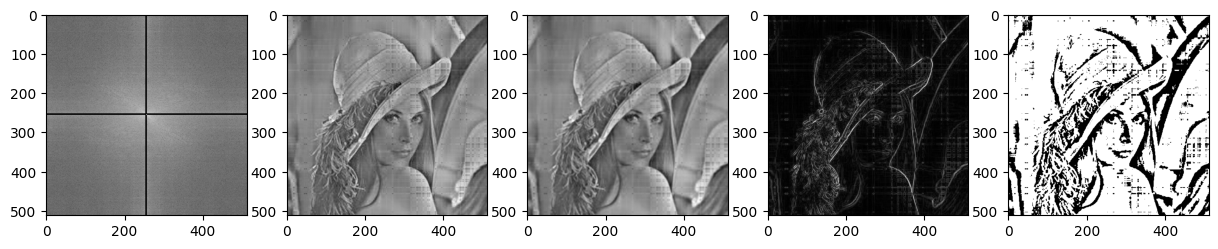

In [ ]:
i2 = io.imread("lena.png")
#A)
i2fft = np.fft.fftshift(np.fft.fft2(i2))
i2fft[:255, 253:257] = 0.1
i2fft[-255:, 253:257] = 0.1
i2fft[253:257, :255] = 0.1
i2fft[253:257, -255:] = 0.1
i2notch = abs(np.fft.ifft2(i2fft))
#B)
i2gauss = gaussian(i2notch)
#C)
i2sob = sobel(i2notch)
#D)
i2ag = unsharp_mask(i2notch, radius = 15, amount = 15)
fig, axes = plt.subplots(1, 5, figsize=(15,6))

axes[0].imshow(np.log(abs(i2fft)), cmap = 'gray')
axes[1].imshow(i2notch, cmap = 'gray')
axes[2].imshow(i2gauss, cmap = 'gray')
axes[3].imshow(i2sob, cmap = 'gray')
axes[4].imshow(i2ag, cmap = 'gray')

###A 1ª imagem, gerada a partir da Transformação de Fourier, corresponde ao espectro modificado para neutralizar as linhas horizontais e verticais observadas na imagem original.

###É possível estabelecer uma comparação entre as imagens 2 e 3, assim como entre as imagens 4 e 5, devido aos objetivos semelhantes que compartilham, conforme indicado na questão anterior.

###As imagens 2 e 3, conforme a comparação realizada entre os filtros de Butterworth e Gaussiano na questão anterior, mantiveram o mesmo comportamento.

###No entanto, as imagens 4 e 5 divergem da comparação realizada na questão anterior devido à imagem conter muitos ruídos, o que tornou necessário realizar alguns ajustes nos parâmetros passados para a função unsharp_masking, a fim de alcançar o seu objetivo. Os parâmetros ajustados foram o raio e o controle da intensidade da imagem. O raio indica o número de pixels ao redor de cada pixel que contribuirá para o cálculo do realce, e o valor que controla a intensidade do realce, ambos ajustados para o valor de 15. O valor escolhido se deve a diversas comparações com outros valores, sendo o único que obteve um resultado aceitável em nossas análises.







#3)
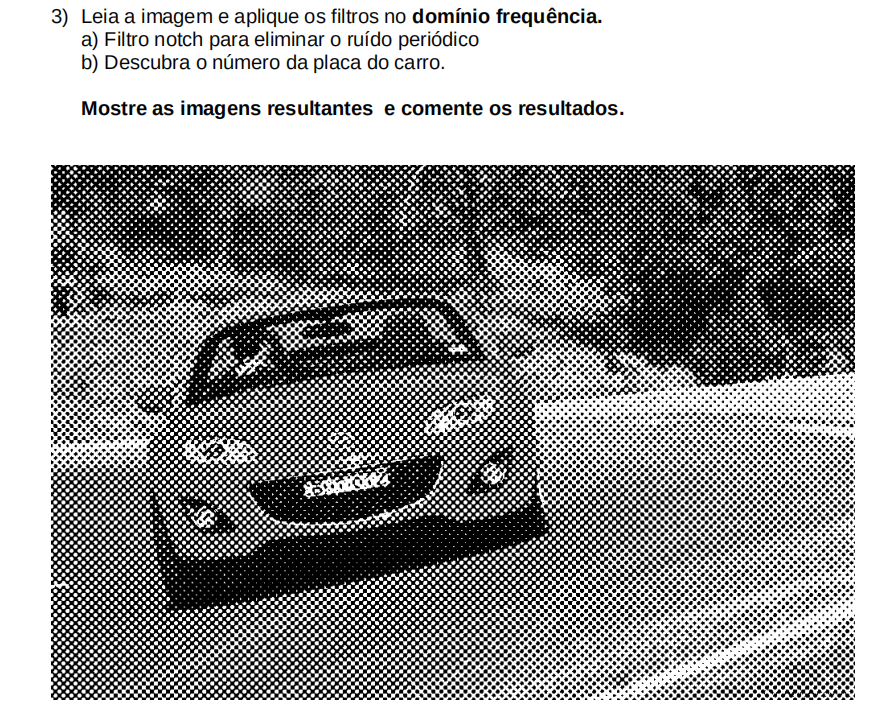

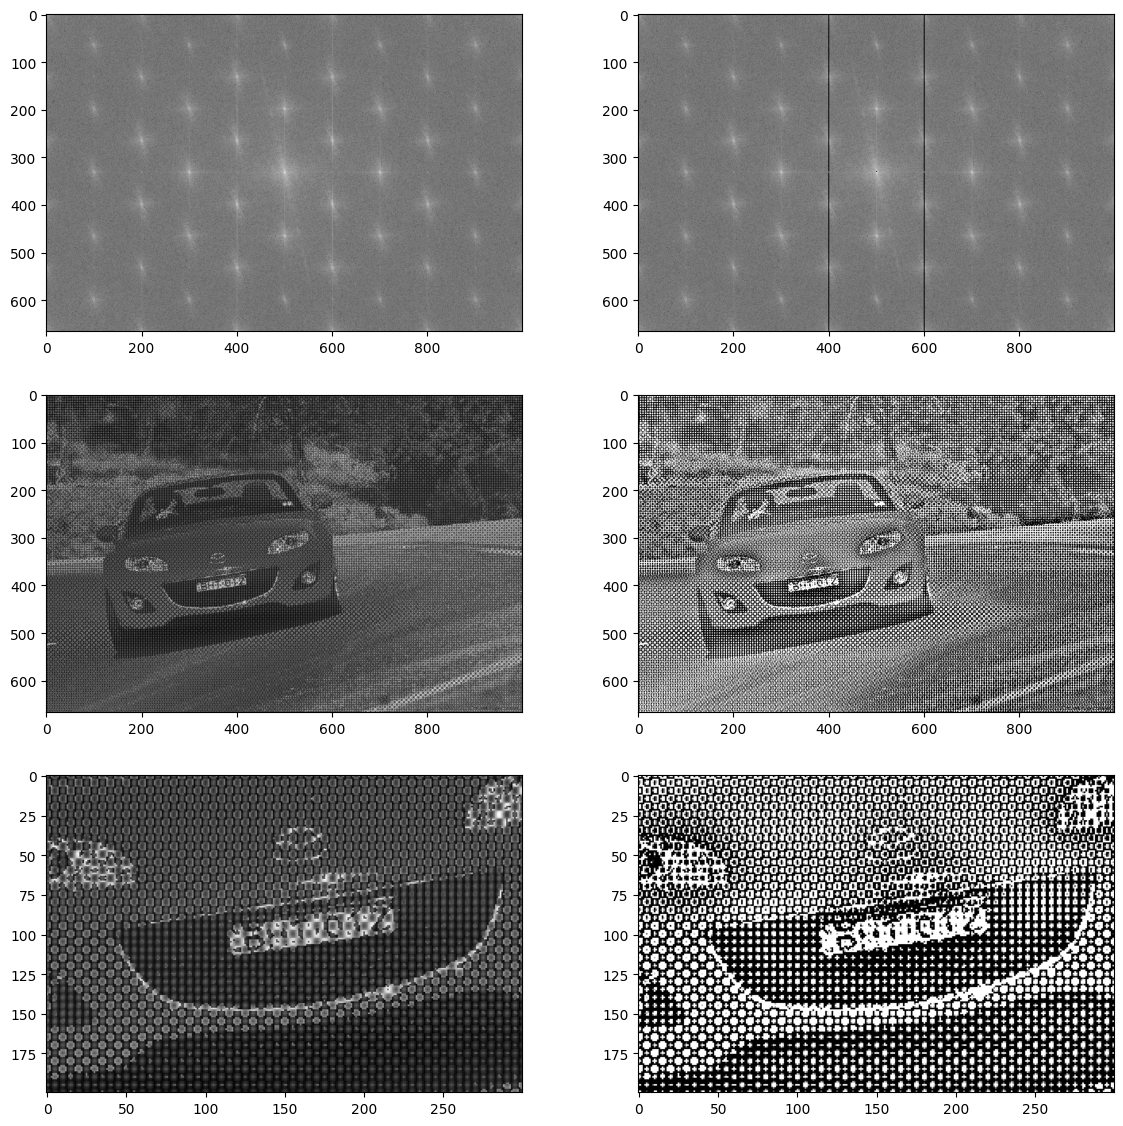

In [ ]:
i3 = io.imread("I2Cvt.png")
#A)
i3fft = np.fft.fftshift(np.fft.fft2(i3))
#B)
i3fft_modif = i3fft.copy()
i3fft_modif[:332, 399:401] = 0.1
i3fft_modif[-332:, 399:401] = 0.1
i3fft_modif[:332, 599:601] = 0.1
i3fft_modif[-332:, 599:601] = 0.1
i3fft_modif[331:333, 499:501] = 0.1
i3fft_modif[-331:333, 499:501] = 0.1
i3notch = abs(np.fft.ifft2(i3fft_modif))
i3ag = unsharp_mask(i3notch, radius = 15, amount = 15)

fig, axes = plt.subplots(3, 2, figsize=(14,14))
axes[0][0].imshow(np.log(abs(i3fft)), cmap = 'gray')
axes[0][1].imshow(np.log(abs(i3fft_modif)), cmap = 'gray')
axes[1][0].imshow(i3notch, cmap = 'gray')
axes[1][1].imshow(i3ag, cmap = 'gray')
axes[2][0].imshow(i3notch[300:500, 200:500], cmap = 'gray')
axes[2][1].imshow(i3ag[300:500, 200:500], cmap = 'gray')

### A 1ª imagem da 1ª linha corresponde ao espectro da imagem original. A partir dela, é possível observar diversas regiões mais claras, das quais destacam-se duas linhas verticais e um ponto central.

### A 2ª imagem da 1ª linha é, portanto, a modificação da 1ª, de modo a neutralizar as regiões mais claras destacadas, permitindo melhor visualização dos detalhes da imagem através da redução do ruído periódico.

### A 1ª imagem da 2ª linha refere-se à imagem obtida a partir da modificação apontada no parágrafo anterior. Nela, a placa do automóvel se torna mais legível.

### A 2ª imagem da 2ª linha trata-se de um aguçamento da 1ª, auxiliando na visualização do conteúdo da placa.

### As imagens da 3ª linha são cortes das superiores.

###R: Placa BHT-01Z